Evaluando data sin feature engienering

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../data/semiprocessed_data.csv')

In [5]:
df.head()

,Price,Year,Mileage,Make,Model
0,8995,2014,0.012506,1,1194
1,10888,2013,0.006863,1,1193
2,8995,2013,0.017102,1,1194
3,10999,2014,0.013976,1,1193
4,14799,2016,0.007751,1,1196


Hacemos un modelo de regresion Lineal

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

X = df.drop('Price', axis=1)
y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("MSE:", mse_lr)
print("MAE:", mae_lr)
print("R2:",r2_lr)

MSE: 145983497.76789597
MAE: 7661.274870299753
R2: 0.20599193912569602


Exportamos el Modelo

In [8]:
import joblib


#joblib.dump(lr_model, 'linear_regresion_model.pkl')

['linear_regresion_model.pkl']

Hacemos ahora un modelo de Decision Tree Regressor

In [9]:
tm_model = DecisionTreeRegressor(random_state=42)
tm_model.fit(X_train, y_train)

y_pred_tm = tm_model.predict(X_test)

mse_tm = mean_squared_error(y_test, y_pred_tm)
mae_tm = mean_absolute_error(y_test, y_pred_tm)
r2_tm = r2_score(y_test, y_pred_tm)

print("MSE:", mse_tm)
print("MAE:", mae_tm)
print("R2 Score:", r2_tm)

MSE: 34658418.9380901
MAE: 3043.860891107971
R2 Score: 0.8114919533045053


Exportamos el Modelo

In [10]:
import joblib


#joblib.dump(tm_model, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

Agregamos hiperarámetros con Grid Search al modelo de Decision Tree para mejorar su rendimiento

In [11]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a probar
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Crear el modelo base
base_model = DecisionTreeRegressor(random_state=42)

# Configurar el GridSearch
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,  # Validación cruzada con 3 divisiones
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo con los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Usar el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el modelo optimizado
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE del modelo optimizado: {mse}")
print(f"MAE del modelo optimizado: {mae}")
print(f"R2 del modelo optimizado: {r2}")


Fitting 3 folds for each of 135 candidates, totalling 405 fits
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=20; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.8s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=20; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=2; total time=   0.6s
[CV] END max_depth=5, m

Exportamos el Modelo

In [12]:
import joblib

# Guarda el modelo optimizado
#joblib.dump(best_model, 'decision_tree_optimized.pkl')


['decision_tree_optimized.pkl']

Hacemos un Modelo Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=20)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MSE del modelo Random Forest:", mse_rf)
print("MAE del modelo Random Forest:", mae_rf)
print("R2 del modelo Random Forest:", r2_rf)


MSE del modelo Random Forest: 19994500.73442563
MAE del modelo Random Forest: 2354.223406438945
R2 del modelo Random Forest: 0.8912493877798942


Exportamos el modelo Random Forest

In [14]:
import joblib

# Guarda el modelo optimizado
#joblib.dump(rf_model, 'random_forest_model.pkl')

Vamos a hacer un modelo SVR con un sample del DF ya que es muy pesado y pudiera tomar mucho tiempo en dar resultados

In [15]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [16]:
df_sample = df.sample(frac=0.1, random_state=42)  # Usa solo el 10% del dataset
X_sample = df_sample.drop('Price', axis=1)
y_sample = df_sample['Price']

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)


In [17]:
# Usar una muestra del dataset
df_sample = df.sample(frac=0.1, random_state=42)
X_sample = df_sample.drop('Price', axis=1)
y_sample = df_sample['Price']

# Dividir datos
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)  # Ajusta los parámetros
svr_model.fit(X_train_sample, y_train_sample)

# Predicciones y métricas
y_pred_svr = svr_model.predict(X_test_sample)
mse_svr = mean_squared_error(y_test_sample, y_pred_svr)
mae_svr = mean_absolute_error(y_test_sample, y_pred_svr)
r2_svr = r2_score(y_test_sample, y_pred_svr)

print("MSE del modelo SVR:", mse_svr)
print("MAE del modelo SVR:", mae_svr)
print("R2 del modelo SVR:", r2_svr)


MSE del modelo SVR: 162822816.2075455
MAE del modelo SVR: 7542.502757403379
R2 del modelo SVR: 0.12330095652824247


In [18]:
import joblib

# Guarda el modelo optimizado
#joblib.dump(svr_model, 'svr_model.pkl')

Hacemos ahora un Modelo KNN y luego lo exportamos

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# Crear y entrenar el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicciones y métricas
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("MSE del modelo KNN:", mse_knn)
print("MAE del modelo KNN:", mae_knn)
print("R2 del modelo KNN:", r2_knn)



MSE del modelo KNN: 18919220.428636175
MAE del modelo KNN: 2368.780735220772
R2 del modelo KNN: 0.8970978654746379


In [20]:
# Guarda el modelo optimizado
#joblib.dump(knn_model, 'knn_model.pkl')

Hacemos un Modelo GBR y luego lo exportamos

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear y entrenar el modelo Gradient Boosting
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gbr_model.fit(X_train, y_train)

# Predicciones y métricas
y_pred_gbr = gbr_model.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("MSE del modelo Gradient Boosting:", mse_gbr)
print("MAE del modelo Gradient Boosting:", mae_gbr)
print("R2 del modelo Gradient Boosting:", r2_gbr)


MSE del modelo Gradient Boosting: 44191472.99227208
MAE del modelo Gradient Boosting: 3838.3021349924534
R2 del modelo Gradient Boosting: 0.759641423076728


In [22]:
#joblib.dump(gbr_model, 'gbr_model.pkl')

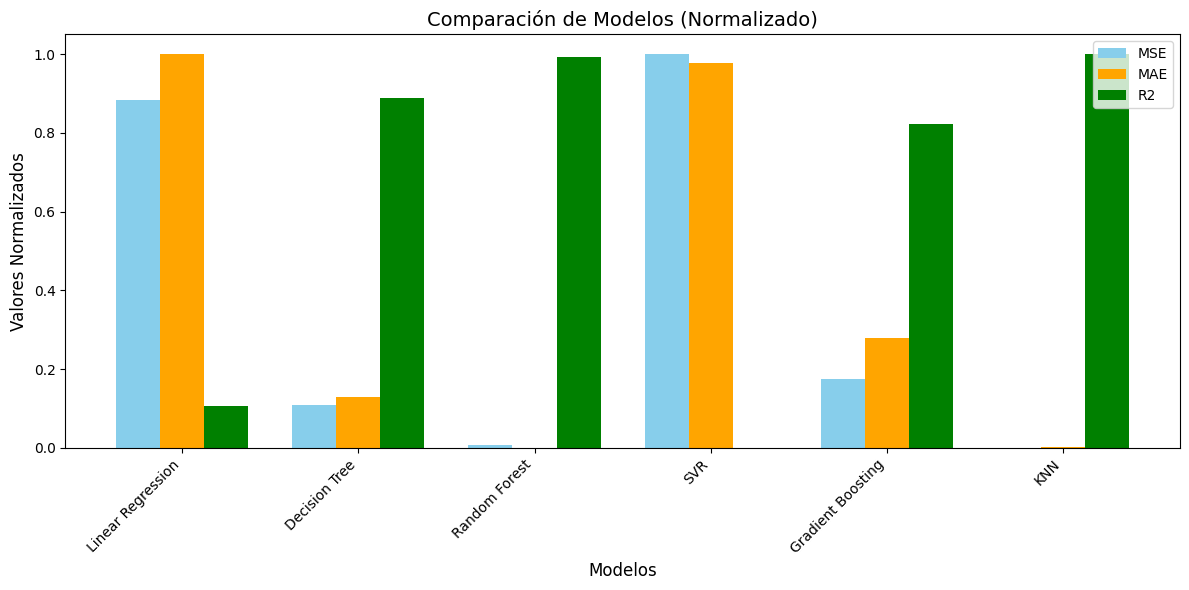

In [27]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear DataFrame con los resultados
data = {
    "Modelo": ["Linear Regression", "Decision Tree", "Random Forest", "SVR", "Gradient Boosting", "KNN"],
    "MSE": [1.459835e+08, 3.465842e+07, 1.999450e+07, 1.628228e+08, 4.419147e+07, 1.891922e+07],
    "MAE": [7661.27, 3043.86, 2354.22, 7542.50, 3838.30, 2368.78],
    "R2": [0.205992, 0.811492, 0.891249, 0.123301, 0.759641, 0.897098]
}

df_results = pd.DataFrame(data)

# Normalizar métricas
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(df_results[["MSE", "MAE", "R2"]])
normalized_df = pd.DataFrame(normalized_metrics, columns=["MSE", "MAE", "R2"])
normalized_df["Modelo"] = df_results["Modelo"]

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.25  # Ancho de las barras
x = np.arange(len(normalized_df["Modelo"]))

# Dibujar las barras para cada métrica
ax.bar(x - width, normalized_df["MSE"], width, label="MSE", color="skyblue")
ax.bar(x, normalized_df["MAE"], width, label="MAE", color="orange")
ax.bar(x + width, normalized_df["R2"], width, label="R2", color="green")

# Agregar etiquetas y título
ax.set_xlabel("Modelos", fontsize=12)
ax.set_ylabel("Valores Normalizados", fontsize=12)
ax.set_title("Comparación de Modelos (Normalizado)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(normalized_df["Modelo"], rotation=45, ha="right", fontsize=10)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


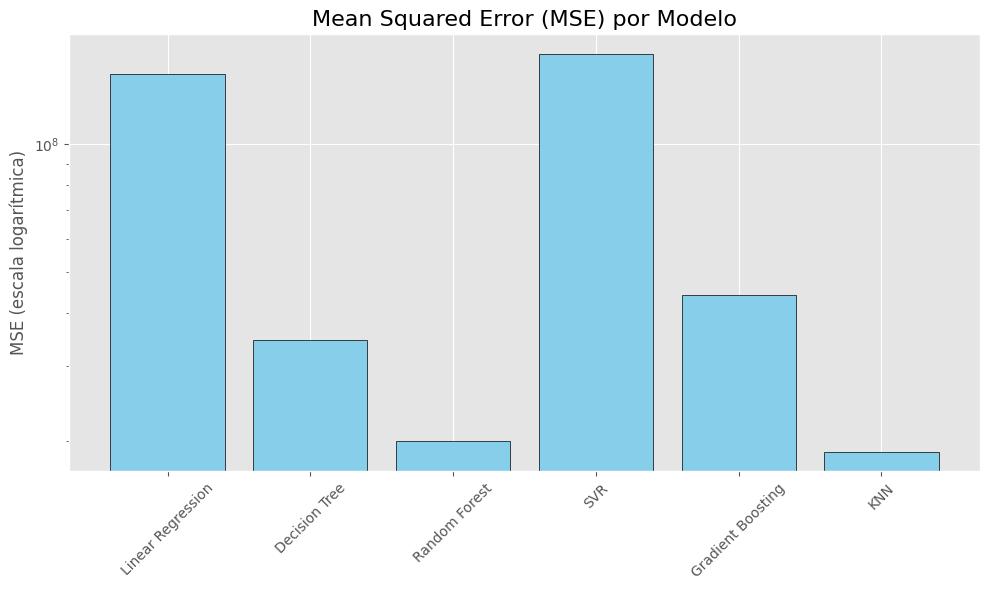

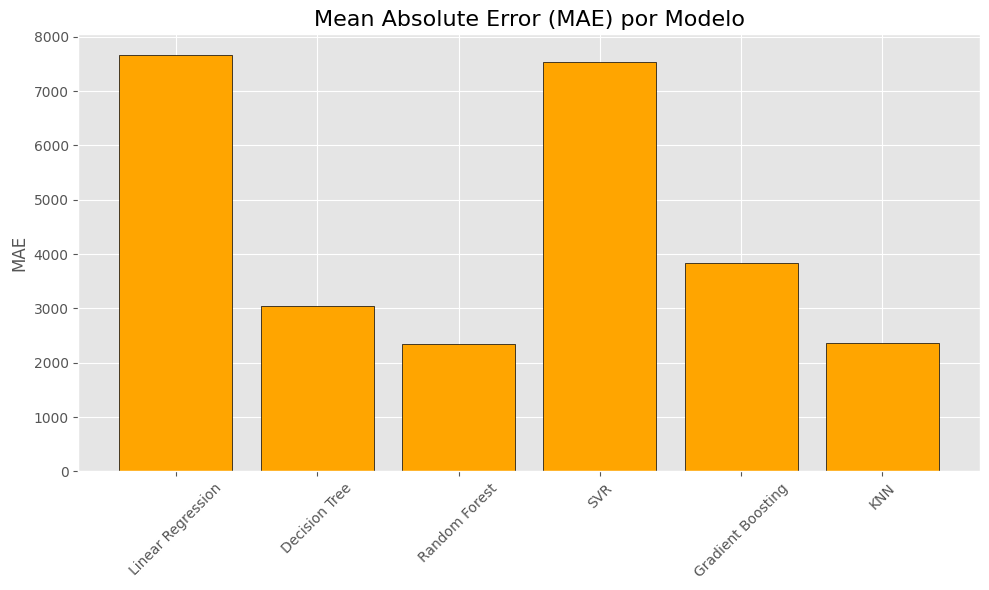

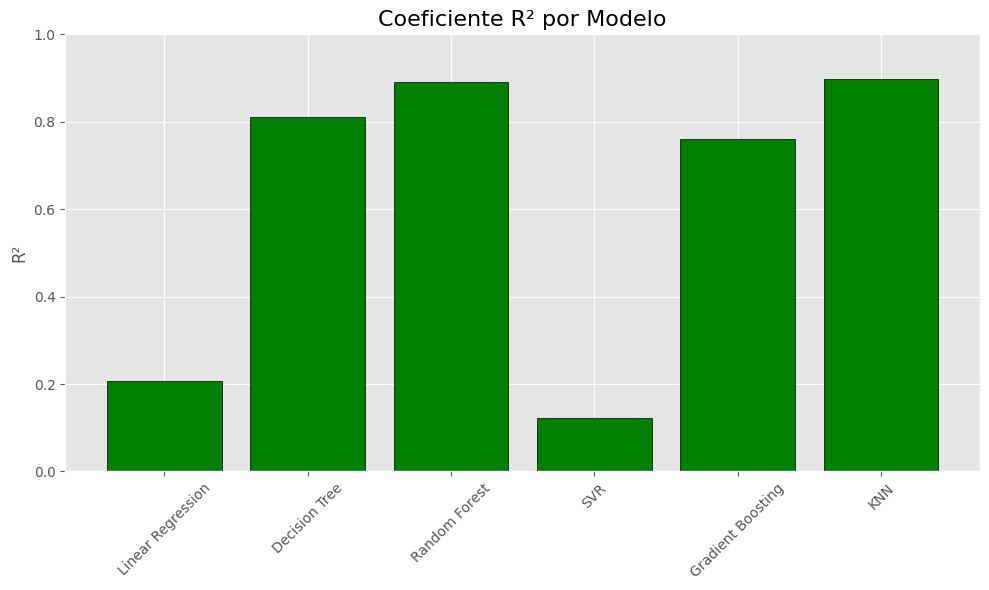

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame con los resultados
data = {
    "Modelo": ["Linear Regression", "Decision Tree", "Random Forest", "SVR", "Gradient Boosting", "KNN"],
    "MSE": [1.459835e+08, 3.465842e+07, 1.999450e+07, 1.628228e+08, 4.419147e+07, 1.891922e+07],
    "MAE": [7661.27, 3043.86, 2354.22, 7542.50, 3838.30, 2368.78],
    "R2": [0.205992, 0.811492, 0.891249, 0.123301, 0.759641, 0.897098]
}

df_results = pd.DataFrame(data)

# Estilo para gráficos profesionales
plt.style.use("ggplot")

# Gráfico para MSE
plt.figure(figsize=(10, 6))
plt.bar(df_results["Modelo"], df_results["MSE"], color="skyblue", edgecolor="black")
plt.title("Mean Squared Error (MSE) por Modelo", fontsize=16)
plt.ylabel("MSE (escala logarítmica)", fontsize=12)
plt.yscale("log")
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Gráfico para MAE
plt.figure(figsize=(10, 6))
plt.bar(df_results["Modelo"], df_results["MAE"], color="orange", edgecolor="black")
plt.title("Mean Absolute Error (MAE) por Modelo", fontsize=16)
plt.ylabel("MAE", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Gráfico para R2
plt.figure(figsize=(10, 6))
plt.bar(df_results["Modelo"], df_results["R2"], color="green", edgecolor="black")
plt.title("Coeficiente R² por Modelo", fontsize=16)
plt.ylabel("R²", fontsize=12)
plt.ylim(0, 1)  # Escala de 0 a 1 para claridad
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()
